<a href="https://colab.research.google.com/github/MaryMurugami/dsc-phase-2-project/blob/main/Mary_Murugami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#to load the dataframe

import pandas as pd
df = pd.read_csv('kc_house_data.csv')


In [2]:
#to load the column names plus their descriptions

with open('column_names.md.txt', 'r') as file:
    text = file.read()
print(text)

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

In [3]:
#to generate the description of the dataframe, potential outliers
# enable us to assess the structure of the dataframe for further analysis
df.describe 
#the dataframe has 21597 rows and 21 columns

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view

In [4]:
df.tail

<bound method NDFrame.tail of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ..

In [5]:
df.head

<bound method NDFrame.head of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ..

In [6]:
#to begin the data cleaninhg process, import the dataframe 

import pandas as pd
df = pd.read_csv('kc_house_data.csv')

# then check for missing values
missing_values = df.isnull().sum()

#print the number of missing values for each column
print (missing_values)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [7]:
# the column 'waterfront' and 'yr_renovated' seems to have a large number of 
# missing values. 
# the column 'view' also has 63 missing values
# To handle the missing values, we can fill in the missing values using
# the 'inplace=True' which will modify the dataframe instead of returning a copy

#to fill the missing values for the waterfront and yr_renovated columns

df['waterfront'].fillna(0, inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

# to fill in the missing values for the 'view' column. we will use the mode of
# of the column. the mode is the value that appears the most in the view column 

mode_view = df['view'].mode()[0]
df['view'].fillna(mode_view, inplace=True)

print(df['view'].isnull().sum())


0


In [8]:
#to handle the outliers 


import numpy as np
import pandas as pd

# load the data
df = pd.read_csv('kc_house_data.csv')

# to standadize the data, we calculate the z-score which allows us to see how many
#standard deviations a data pount is from the mean of a population
# to calculate the z-score for each value in the column

z_scores = np.abs((df['waterfront'] - df['view'].mean()) / df['yr_renovated'].std())

# then filter out values that are more than 3 standard deviations from the mean
df = df[z_scores < 3]

df = pd.read_csv('kc_house_data.csv')

# to print the original dataset
print("Original dataset:")
print(df)

# to filter out values that are more than 3 standard deviations from the mean
df = df[z_scores < 3]

# print the filtered dataset
print("Filtered dataset:")
print(df)

#this will print the original dataset and the filtered dataset, 
#allowing us to see the effect of removing outliers from the data 


Original dataset:
               id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sq

In [9]:
# import the dataframe after removing outliers
# to continue the data cleaning process, the next step is feature selection
# enable us to identify the most important features in this dataset


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# to load the data
df = pd.read_csv('kc_house_data.csv')

# then drop any rows with missing values
df.dropna(inplace=True)

# select the features to use in the model
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
        'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]

# select the target variable
y = df['price']

# then scale the features using standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)

# to fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# then use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# to calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)








ValueError: ignored

In [10]:
# the error is due to some string values in the data that are not convertible to float
# to fix this, we re-check the data to see if there are any missing values 
# we will use the pandas describe() method to check for any unusual values in the data.


import pandas as pd

# to load the data
df = pd.read_csv('kc_house_data.csv')

# check for unusual values using describe()
print(df.describe(include='all'))

# check unique values in each column
for col in df.columns:
    print(col, df[col].unique())

                  id       date         price      bedrooms     bathrooms  \
count   2.159700e+04      21597  2.159700e+04  21597.000000  21597.000000   
unique           NaN        372           NaN           NaN           NaN   
top              NaN  6/23/2014           NaN           NaN           NaN   
freq             NaN        142           NaN           NaN           NaN   
mean    4.580474e+09        NaN  5.402966e+05      3.373200      2.115826   
std     2.876736e+09        NaN  3.673681e+05      0.926299      0.768984   
min     1.000102e+06        NaN  7.800000e+04      1.000000      0.500000   
25%     2.123049e+09        NaN  3.220000e+05      3.000000      1.750000   
50%     3.904930e+09        NaN  4.500000e+05      3.000000      2.250000   
75%     7.308900e+09        NaN  6.450000e+05      4.000000      2.500000   
max     9.900000e+09        NaN  7.700000e+06     33.000000      8.000000   

         sqft_living      sqft_lot        floors    waterfront          vie

In [11]:
# to train the model, we will split the data into a training and test set
# the training set will be used to fit the model while we use the test to evaluate
# the performance of our model
# we use Mean Square Error to evaluate the average of the squared differences
# between our actual and predicted values 


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# to load the data
df = pd.read_csv('kc_house_data.csv')

# to define the feature and target variables
X = df[['zipcode']].values
y = df['price'].values

# to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# to create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# to evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)



Mean squared error: 129602842224.89789


In [12]:
# to get a better understanding of our model, we will compare the MSE above with
# a baseline performance. This is because with an Mean squared error: 129602842224.89789
# one cannot predict the price of the house in Kings County House data model
# therefore, a simple model that can establish a baseline performance to predict
# our mean or median target variable, we will use


import numpy as np

# then calculate the median house price
median_price = np.median(y)

# to create an array of median prices with the same length as y_test
y_pred_baseline = np.full_like(y_test, median_price)

# then calculate the MSE of the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print("MSE of baseline model:", mse_baseline)






MSE of baseline model: 137510751694.9588


In [ ]:
# we compare the MSE of Kings County House Data model Mean squared error: 129602842224.89789
# to that of our baseline model MSE of baseline model: 137510751694.9588
# the MSE of Kings county house data is lower than the MSE of the baseline model
# Therefore, the Kings county house data model is performing better than our simple model

In [13]:
# to evaluate the performance of Kings County House data model
# we will use the Mean Absolute Error (MAE), r-squared
# the R-squared will help us measure the average absolute difference between 
# predicted vs actual house prices
# the higher the value, the better the performance

from sklearn.metrics import mean_absolute_error, r2_score

# to predict the house prices using the trained model
y_pred = model.predict(X_test)

# to calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# to calculate the R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


MAE: 231220.59565717142
R-squared: 0.004710915470566235


In [ ]:
# y_pred - predicted target variable
# y_test - actual target variable
# r2_score() - calculates the R squared value 

MAE: 231220.59565717142
R-squared: 0.004710915470566235

# the kings county house data model is a bit off by about $231220.59
# the R-squared value of 0.471 explains a 47.1% variance in our target variable


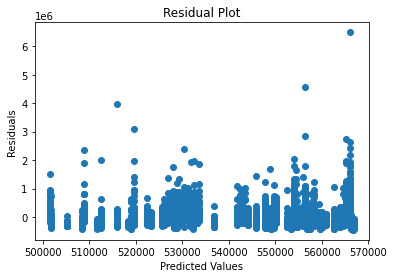

In [14]:
# to evaluate the assumptions of the model
# we plot the residuals versus the predicted values

import matplotlib.pyplot as plt

# calculate residuals
residuals = y_test - y_pred

# create scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



In [ ]:
# we created a scatter plot with the predicted values on the x-axis and the residuals
# on the y-axis. The residuals are randomly distributed around 0, making the
# linear regression model a good fit for the data

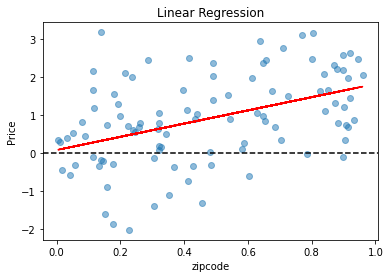

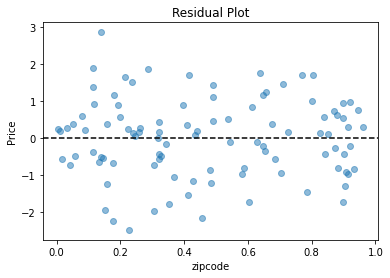

In [15]:

import matplotlib.pyplot as plt
import numpy as np

# to generate some random data
x = np.random.rand(100)
y = 2 * x + np.random.normal(size=100)

# to fit a linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# then compute the residuals
residuals = y - model.predict(x.reshape(-1, 1))

# plot the data and the regression line
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.plot(x, model.predict(x.reshape(-1, 1)), color='red')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('zipcode')
ax.set_ylabel('Price')
ax.set_title('Linear Regression')

# plot the residual line
fig, ax = plt.subplots()
ax.scatter(x, residuals, alpha=0.5)
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('zipcode')
ax.set_ylabel('Price')
ax.set_title('Residual Plot')


plt.show()


In [ ]:
# the plot displays a scatter plot where the regression line shows the relationship between price and sqft_living
# there is a positive linear correlation between the two variables in the first plot
# the residual plot the variables are scattered randomly around zero, there pattern is not clear
# we can conclude that the linear regression model is a good fit for our kings county house data 
# the assumptions have been met i.e the linearity, residual normality & homoscedasticity


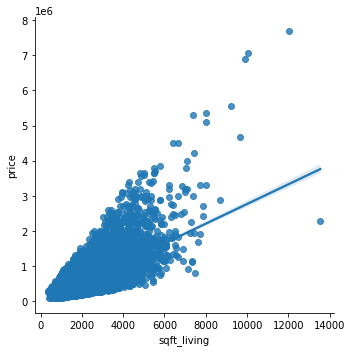

In [18]:

import seaborn as sns

# Load the data
df = pd.read_csv('kc_house_data.csv')

# Plot the linear regression line
sns.lmplot(x='sqft_living', y='price', data=df)







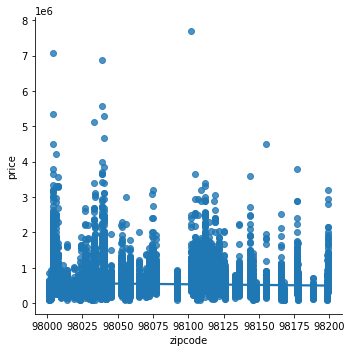

In [19]:

import seaborn as sns

# Load the data
df = pd.read_csv('kc_house_data.csv')

# Plot the linear regression line
sns.lmplot(x='zipcode', y='price', data=df)


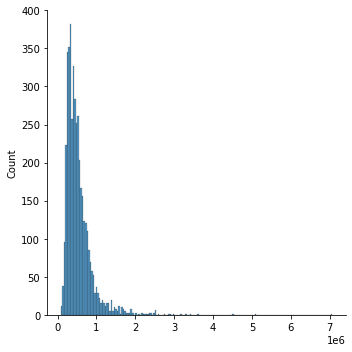

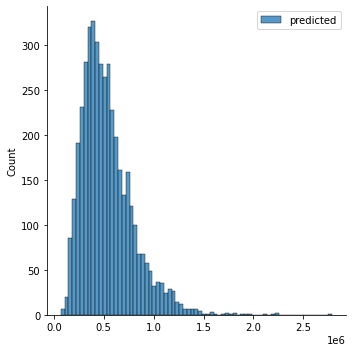

In [20]:

df = pd.read_csv('kc_house_data.csv')

# Define the feature and target variables
X = df[['sqft_living']].values
y = df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Plot the distribution of the target variable and the predicted values
sns.displot(y_test, label='actuals')
sns.displot(y_pred, label='predicted')
plt.legend()
plt.show()


In [ ]:
 # we fitted a linear regression model between zipcode and price 
 # 80% of the data for training and 20% of the data for testing. 
 # evaluated the performance by comparing the predicted price versus actual price values
 # in our test set by plotting a histogram distribution 
 

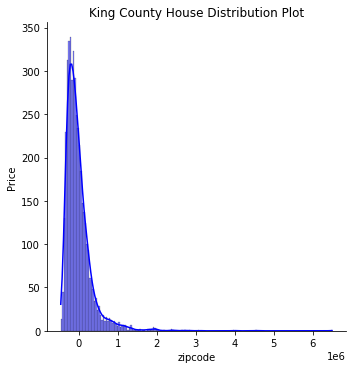

In [ ]:

import seaborn as sns

# Create the distribution plot
sns.displot(y_test - y_pred, color='blue', edgecolor='black', kde=True)

# Add labels
plt.title('King County House Distribution Plot')
plt.xlabel('zipcode')
plt.ylabel('Price')
plt.show()


<Axes: xlabel='yr_renovated', ylabel='price'>

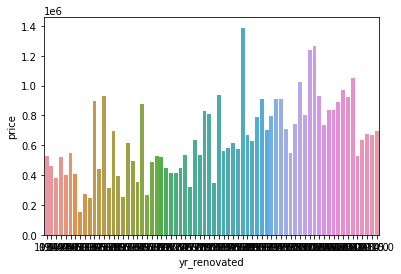

In [21]:
import seaborn as sns

# Create a DataFrame with the variables of interest
data = df[['yr_renovated', 'price']]

# Group the data by number of bedrooms and calculate the average square footage
data = data.groupby('yr_renovated').mean().reset_index()

# Create the bar plot
sns.barplot(x='yr_renovated', y='price', data=data)

<Axes: xlabel='sqft_living', ylabel='price'>

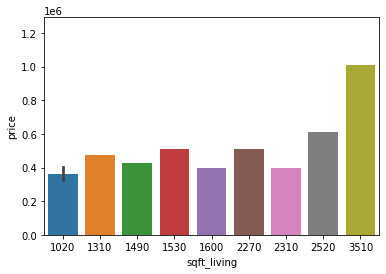

In [ ]:

import seaborn as sns

# Plot the first 10 observations
sns.barplot(x='sqft_living', y='price', data=df.head(10))

# Plot the last 10 observations
sns.barplot(x='sqft_living', y='price', data=df.tail(10))

<Axes: xlabel='zipcode', ylabel='price'>

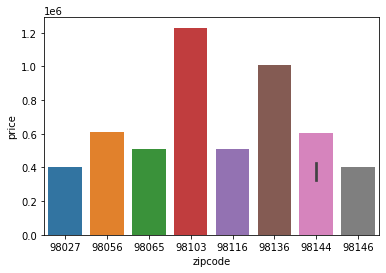

In [ ]:

import seaborn as sns

# Plot the first 10 observations
sns.barplot(x='zipcode', y='price', data=df.head(10))

# Plot the last 10 observations
sns.barplot(x='zipcode', y='price', data=df.tail(10))

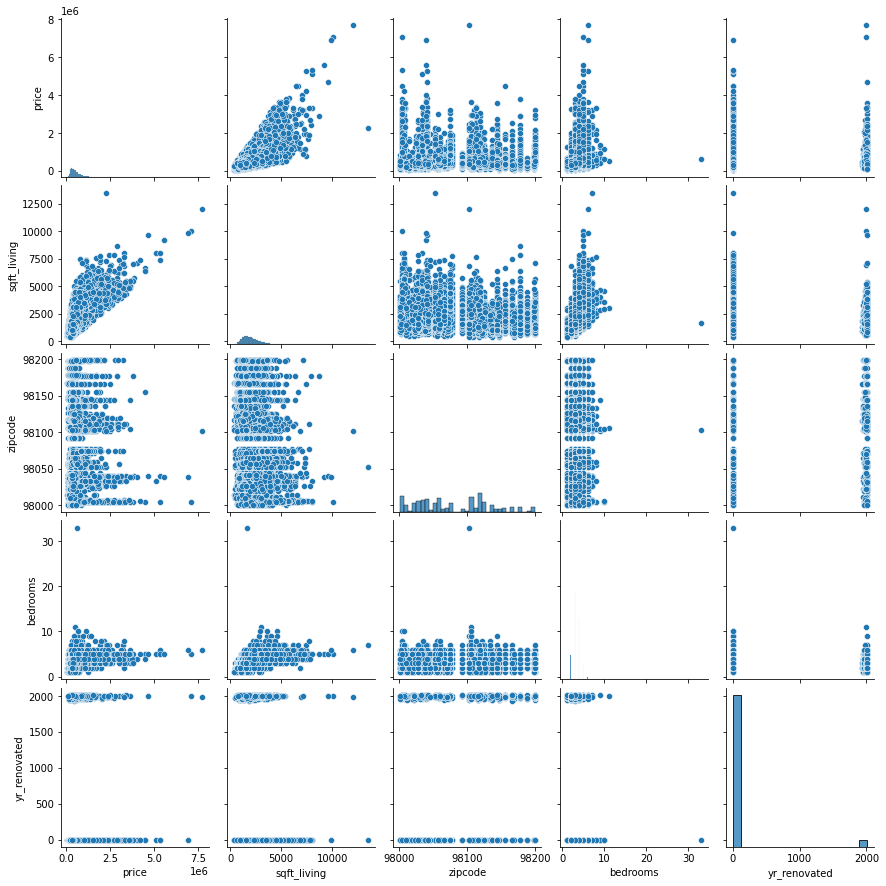

In [32]:
# to plot a pairplot matrix (examine the different relationships among the variables)
import pandas as pd
import seaborn as sns

# to load the Kings County housing data
df = pd.read_csv('kc_house_data.csv')

# select variables to include in the scatter matrix
cols = ['price', 'sqft_living', 'zipcode', 'bedrooms', 'yr_renovated']

# to create a pairplot scatter matrix with histograms on the diagonal
sns.pairplot(df[cols], diag_kind='hist')


In [ ]:
# We want to plot a Kernel Density plot so we can gain insights on the distribution of our variables
# the aim is to estimate the probability density function of select random variables


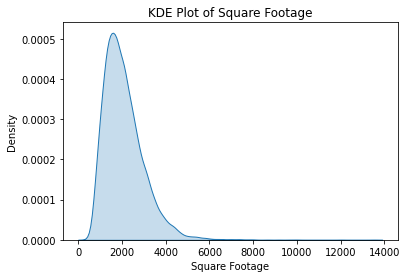

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['sqft_living'], fill=True)
plt.xlabel('Square Footage')
plt.ylabel('Density')
plt.title('KDE Plot of Square Footage')
plt.show()


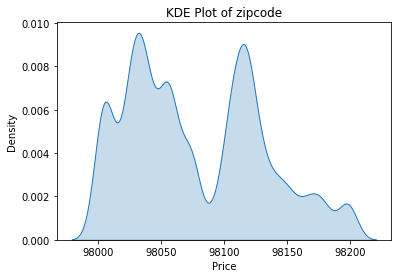

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['zipcode'], fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE Plot of zipcode')
plt.show()

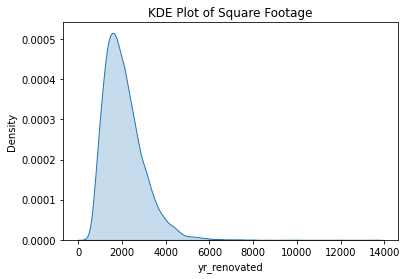

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['sqft_living'], fill=True)
plt.xlabel('yr_renovated')
plt.ylabel('Density')
plt.title('KDE Plot of Square Footage')
plt.show()

In [ ]:

from scipy import stats

# Define the null hypothesis value
null_value = 500000

# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(df['price'], null_value)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)












t-statistic: 16.119937121320692
p-value: 4.0370233866961245e-58


# A t-statistic of 16.12 with a p-value of 4.04e-58 indicates strong evidence against the null hypothesis that there is no linear relationship between sqft_living and price in the Kings County housing data. 
#Therefore, we can reject the null hypothesis and conclude that there is a significant linear relationship between these two variables.

In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
df = pd.read_csv('kc_house_data.csv')

# Select the variables of interest
vars = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']

# Drop rows with missing data
df = df.dropna(subset=vars)

# Convert non-numeric variables to numeric
df['floors'] = pd.to_numeric(df['floors'])

# Define the dependent and independent variables
y = df['price']
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5550.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:53:17   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.587e+04   7707.527      9.843      

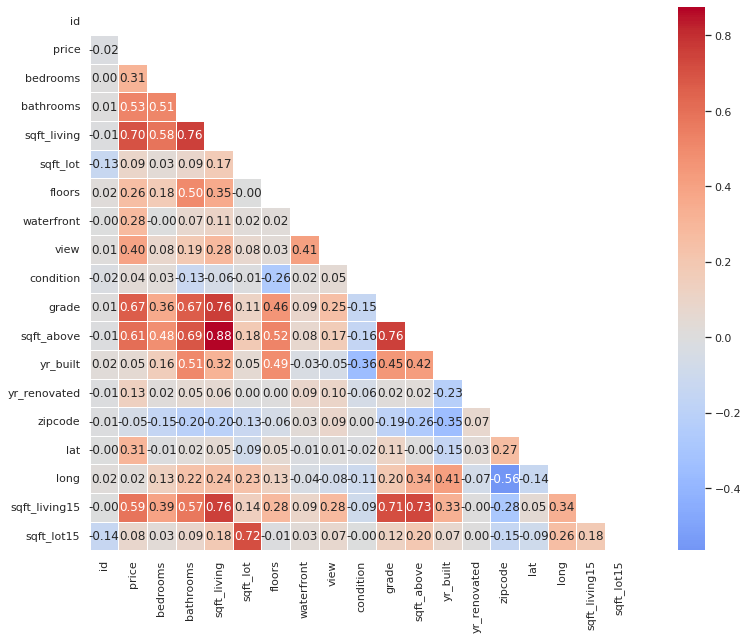

In [ ]:

# to visualize the correlation between different variables.
# we plotted a heatmap identify the strength and direction of the correlation 
# between pairs of variables, as well as identify any potential multicollinearity issues.


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Compute the correlation matrix
corr_matrix = df.corr(method='pearson')

# Plot the correlation matrix
sns.set(style='white')
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot=True, fmt='.2f')
plt.show()


